In [4]:
# import numpy as np
# import pandas as pd

import pickle
import networkx as nx
import matplotlib.pyplot as plt

def get_pos2d(G):
    # creates a dictionnary of x,y position with node id as the keys
    return {key: value[0:2] for key, value in nx.get_node_attributes(G,'pos').items()}

def get_pos3d(G):
    # creates a dictionnary of x,y,z position with node id as the keys
    return nx.get_node_attributes(G,'pos')


In [5]:
#LOAD CAVE GRAPH

number = 'C001'
cavename = 'Poteu'
# path = f"C:/Users/celia/github/erc-karst-repositories/networks_datasets/{number}_{cavename}/clean_data/Graph_{cavename}.pickle"
path = f"{number}_{cavename}/clean_data/Graph_{cavename}.pickle"
G = pickle.load(open(path, 'rb'))

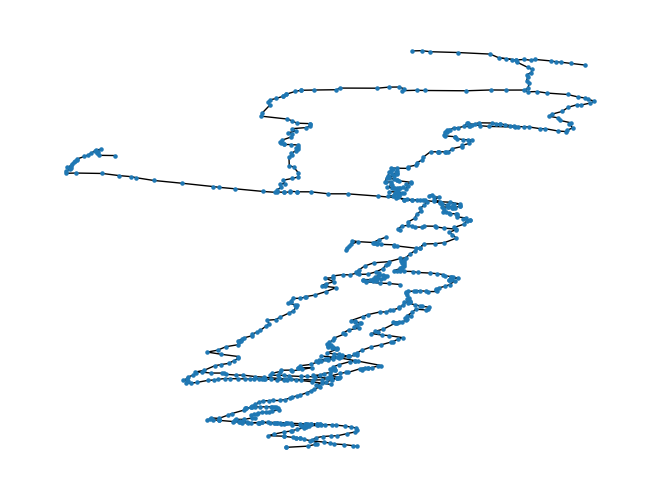

In [6]:
#BASIC PLOT IN PLAN VIEW FROM NETWORKX

nx.draw(G,get_pos2d(G),node_size=5)

In [7]:
#Calculate karstnet statistics

import karstnet as kn

#load graph into a karstnet object
Kg = kn.from_nxGraph(G, dict(G.nodes('pos')), properties=None, verbose=True)


 This network contains  1  connected components



In [9]:
#print results and analysis
results = Kg.characterize_graph( verbose=True )

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 70.732
                 cv length = 1.386
            length entropy = 0.495
                tortuosity = 1.312
       orientation entropy = 0.957
                      aspl = 8.146
                       cpd = 0.476
               mean degree = 2.247
                 cv degree = 0.450
 correlation vertex degree = -0.313
--------------------------------------


In [10]:
analysis = Kg.basic_analysis()




 This network contains :
 853  nodes (stations) and  862  edges.
  On the simplified graph, there are :  73  nodes (stations) and  82  edges,
 27  are extremity nodes (entries or exits) and  42  are junction nodes.
There is/are  1  connected component.s and  10  cycle.s.


Howard's parameter are (Howard, 1970) :  
 alpha:  0.07092198581560284 
 beta 1.1232876712328768 
 gamma 0.38497652582159625

Note that this computation considers the node of degree 2  necessary to loop preservations as Seed Nodes, in order to  stay consistent with Howard's illustrations.


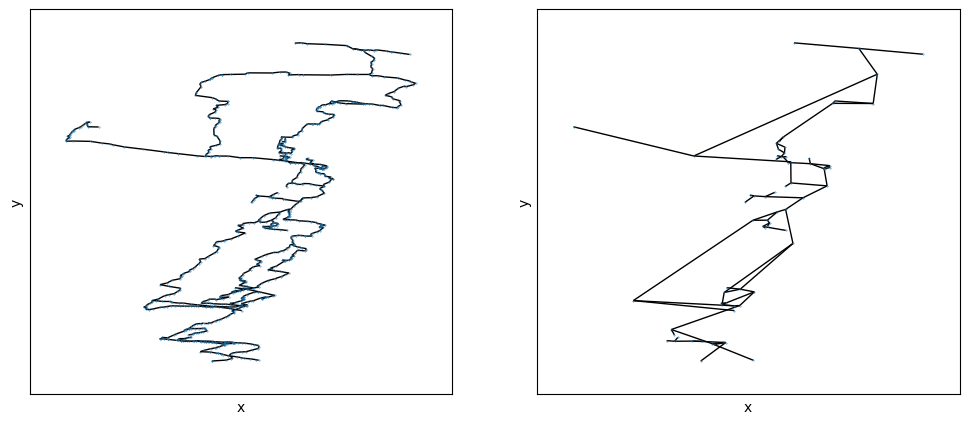

In [11]:
#plot the graph and simplified graph
fig1 = Kg.plot()



C:\Users\celia\anaconda3\envs\network\Lib\site-packages\karstnet\base.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
C:\Users\celia\anaconda3\envs\network\Lib\site-packages\karstnet\base.py:375: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


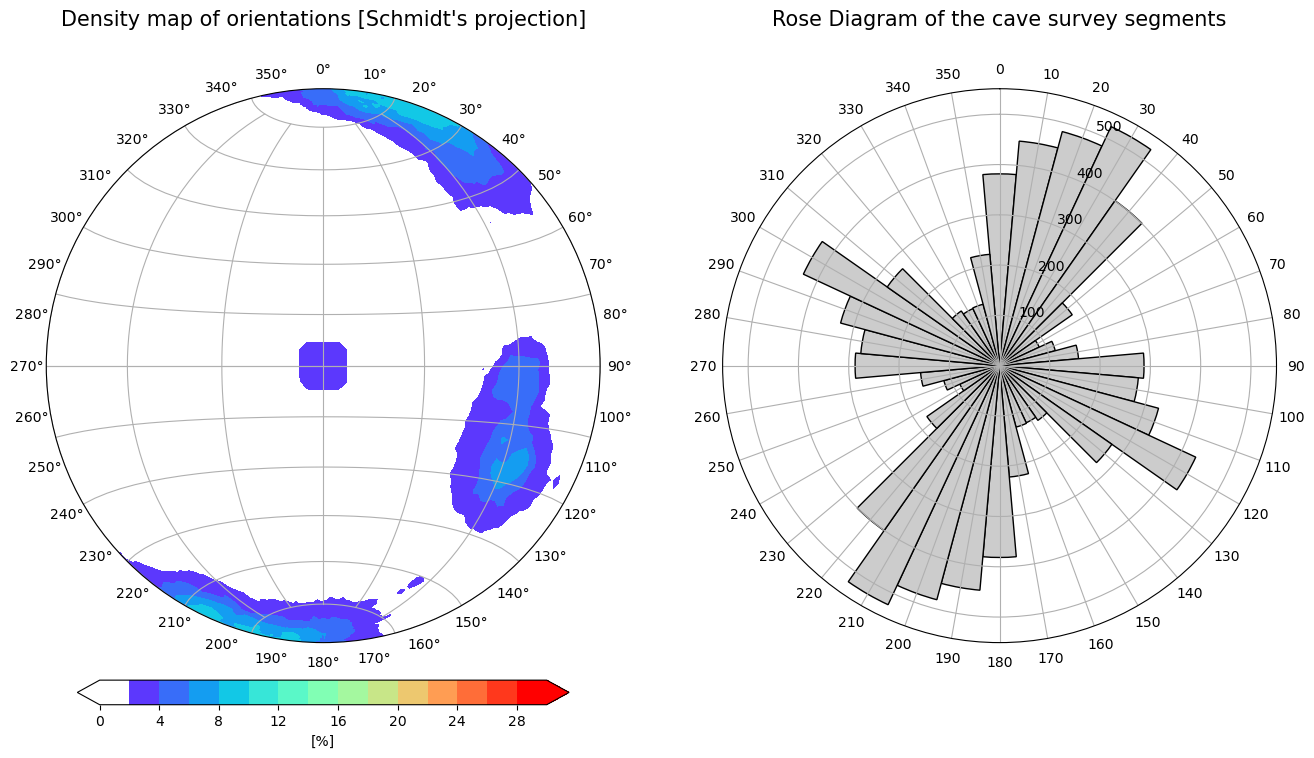

In [12]:
#plot the stereo plot
fig2 = Kg.stereo()